In [1]:
# Import necessary modules first.
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
!unzip /content/UTKFace_with_2300_images-20231112T191702Z-001.zip

Archive:  /content/UTKFace_with_2300_images-20231112T191702Z-001.zip
  inflating: UTKFace_with_2300_images/83_0_0_20170111211106903.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/75_0_0_20170111204138781.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/84_1_0_20170109150746501.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/9_0_0_20170110224437980.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/75_1_0_20170110183942473.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/76_1_0_20170110182941342.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/80_0_0_20170117171459531.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/9_0_2_20161219192439379.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/8_0_0_20170110215948795.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/78_0_0_20170120225240993.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/72_1_0_20170110183814706.jpg.chip.jpg  
  inflating: UTKFace_with_2300_images/77_1_0_20170113002117891.jpg.chip.jpg 

In [15]:
#BASE_DIR = 'C:/Users/hp/Desktop/utkface_aligned_cropped/UTKFace'
BASE_DIR = '/content/UTKFace_with_2300_images'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/2386 [00:00<?, ?it/s]

In [16]:
import random

# Assuming you have three lists: age_labels, gender_labels, and image_paths
# Sample size
sample_size = 10

# Generate random indices
random_indices = random.sample(range(2386), sample_size)

# Use random indices to select elements from each list
age_labels = [age_labels[i] for i in random_indices]
gender_labels = [gender_labels[i] for i in random_indices]
image_paths = [image_paths[i] for i in random_indices]


In [14]:
#random_indices

In [17]:
# Print the total number of labels and image paths after the loop
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 10, Number of gender_labels: 10, Number of image_paths: 10


In [18]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [19]:
import pandas as pd
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(5)

,image_path,age,gender
0,/content/UTKFace_with_2300_images/3_1_0_20161220220147617.jpg.chip.jpg,3,1
1,/content/UTKFace_with_2300_images/16_1_0_20170109214605824.jpg.chip.jpg,16,1
2,/content/UTKFace_with_2300_images/2_0_1_20170110213721101.jpg.chip.jpg,2,0
3,/content/UTKFace_with_2300_images/53_0_0_20170104205937252.jpg.chip.jpg,53,0
4,/content/UTKFace_with_2300_images/35_1_0_20170117185506936.jpg.chip.jpg,35,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  10 non-null     object
 1   age         10 non-null     int64 
 2   gender      10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [21]:
pd.set_option('display.max_colwidth', None)

In [22]:
df['gender_label'] = df['gender'].apply(lambda x: gender_mapping[x])

In [23]:
import pandas as pd

# Assuming your DataFrame is named df and contains a column 'age'
bins = [0, 8, 17, 26, 35, 45, 60, 80, 116]
labels = ['1 to 8', '9 to 17', '18 to 26', '27 to 35', '36 to 45', '46 to 60', '61 to 80', '81 to 116']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the DataFrame to verify the changes
print(df)


                                                                image_path  \
0   /content/UTKFace_with_2300_images/3_1_0_20161220220147617.jpg.chip.jpg   
1  /content/UTKFace_with_2300_images/16_1_0_20170109214605824.jpg.chip.jpg   
2   /content/UTKFace_with_2300_images/2_0_1_20170110213721101.jpg.chip.jpg   
3  /content/UTKFace_with_2300_images/53_0_0_20170104205937252.jpg.chip.jpg   
4  /content/UTKFace_with_2300_images/35_1_0_20170117185506936.jpg.chip.jpg   
5  /content/UTKFace_with_2300_images/90_1_0_20170110175843628.jpg.chip.jpg   
6  /content/UTKFace_with_2300_images/62_0_1_20170113184846159.jpg.chip.jpg   
7  /content/UTKFace_with_2300_images/25_0_1_20170116001410569.jpg.chip.jpg   
8  /content/UTKFace_with_2300_images/58_0_4_20170104213132981.jpg.chip.jpg   
9  /content/UTKFace_with_2300_images/55_1_3_20170109150632123.jpg.chip.jpg   

   age  gender gender_label  age_group  
0    3       1       Female     1 to 8  
1   16       1       Female    9 to 17  
2    2       0    

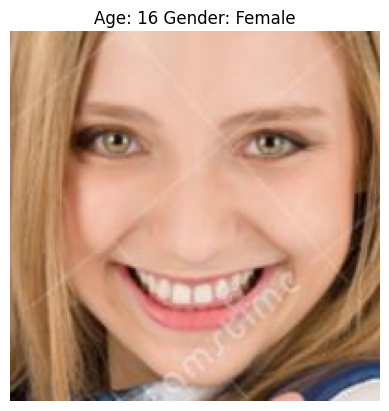

In [24]:
"""## Exploratory Data Analysis"""
rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

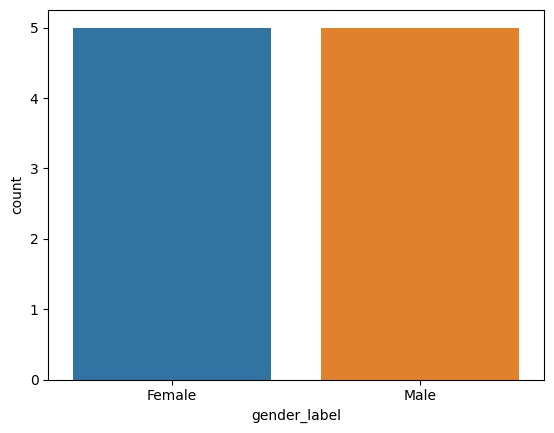

'The distribution roughly follows a normal distribution that is slightly skewed to the right with a median of around 27 years. The range is from 0 to 120 years. There are some outliers at the higher end of the distribution.'

In [25]:
# Gender distribution
sns.countplot(x='gender_label', data=df)
plt.show()
"""The distribution roughly follows a normal distribution that is slightly skewed to the right with a median of around 27 years. The range is from 0 to 120 years. There are some outliers at the higher end of the distribution."""


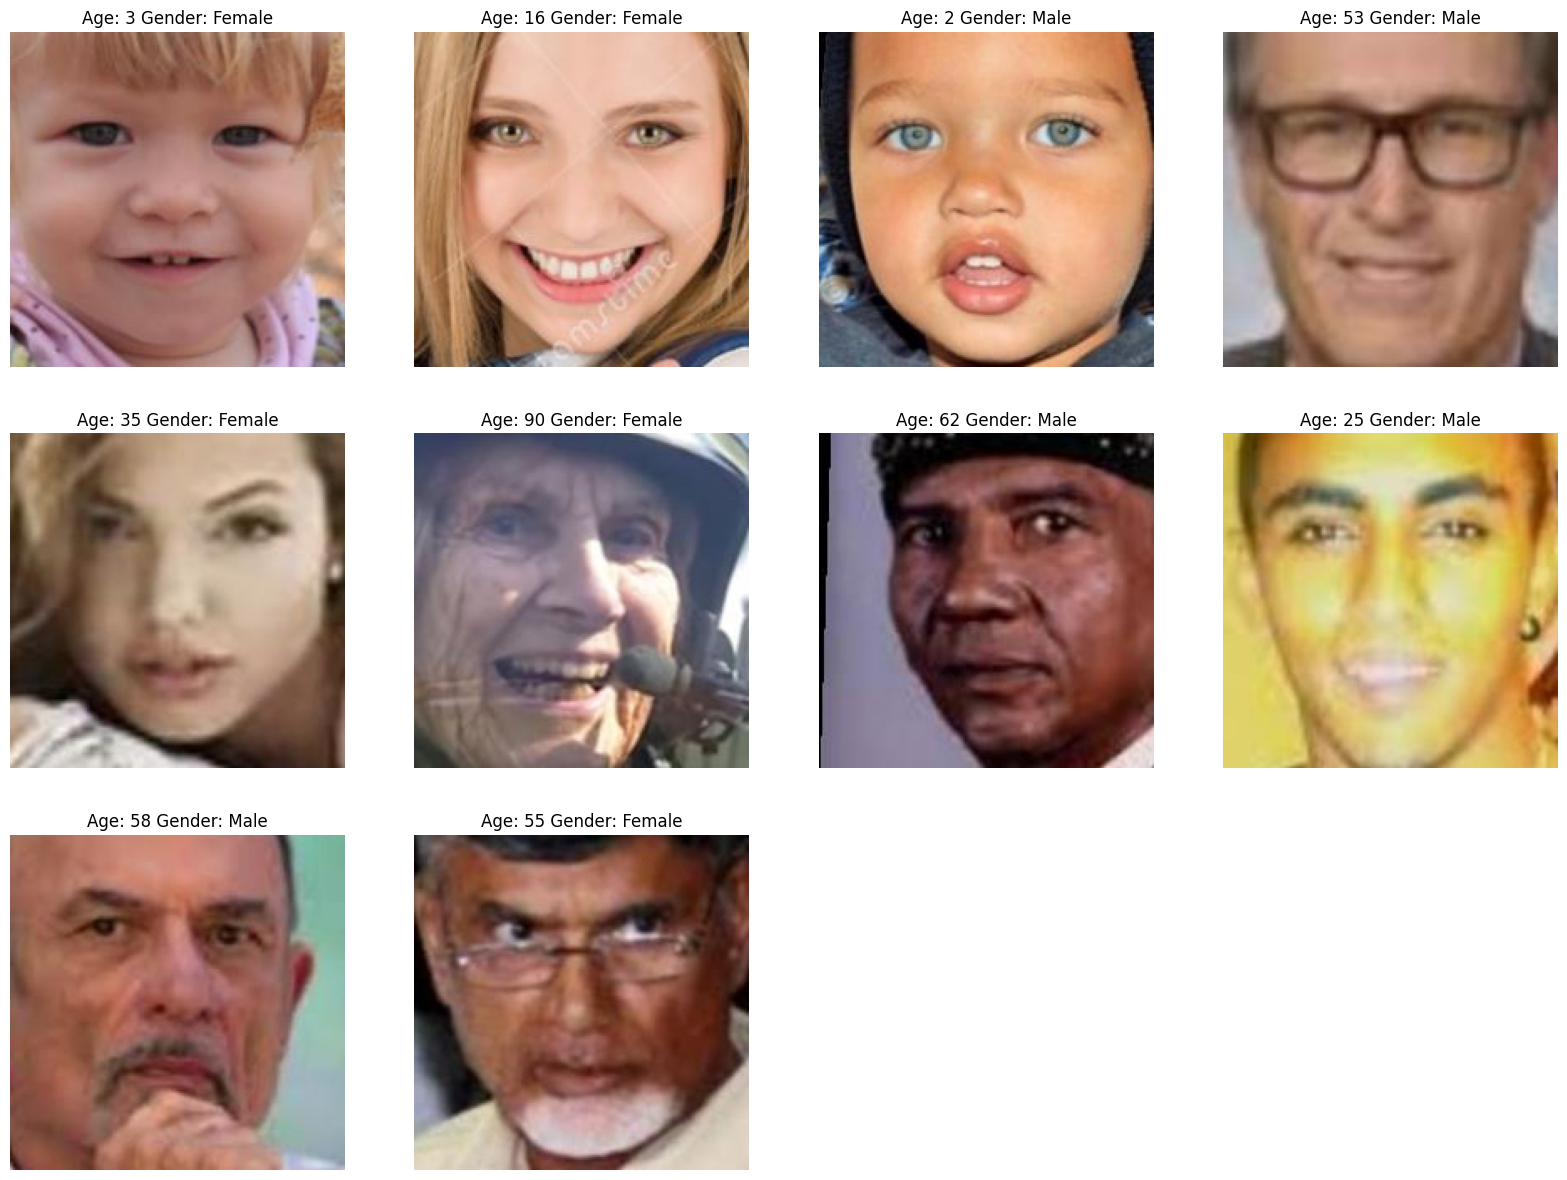

In [26]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample, age, gender,gender_label,age_group in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)


In [27]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [31]:
base_model = VGG16(weights='imagenet', include_top=False)

In [32]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

In [33]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((224, 224))
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        feature = model.predict(img_array)
        features.append(feature)

    features = np.array(features)
    return features

In [34]:
X = extract_image_features(df['image_path'])

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 1s 527ms/step


In [37]:
# convert X to np array
X = np.array(X)
X = np.squeeze(X)

In [41]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age_group'])

In [47]:
num_age_classes = df['age_group'].nunique()

In [67]:
X.shape

(10, 14, 14, 512)

In [82]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model

# Define the input shape
input_shape = X[0].shape

# Input layer
inputs = Input(shape=input_shape)

# Convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(conv_1)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(conv_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

# Flatten layer
flatten = Flatten()(max_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dropout_1 = Dropout(0.3)(dense_1)

# Output layer for gender classification
output_gender = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)

# Fully connected layers for age classification
dense_2 = Dense(256, activation='relu')(flatten)
dropout_2 = Dropout(0.3)(dense_2)
output_age = Dense(num_age_classes, activation='softmax', name='age_out')(dropout_2)

# Assuming num_age_classes is the number of age classes you have, e.g., 10

# Define the model with multiple outputs
model = Model(inputs=inputs, outputs=[output_gender, output_age])

In [83]:
# Split the data into training and testing sets (70% train, 30% test)
# Split the data into training and testing sets for both gender and age
X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test = train_test_split(
    X, y_gender, y_age, test_size=0.3, random_state=42
)

In [92]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming y_age contains string labels like '1 to 8' or numerical labels
label_encoder = LabelEncoder()
y_age_train_one_hot = to_categorical(label_encoder.fit_transform(y_age_train), num_classes=num_age_classes)
y_age_test_one_hot = to_categorical(label_encoder.fit_transform(y_age_test),  num_classes=num_age_classes)

In [93]:
from keras.metrics import BinaryAccuracy, Precision, Recall, AUC, CategoricalAccuracy, PrecisionAtRecall, AUC

# Compile the model with appropriate loss functions and metrics for each output
model.compile(
    optimizer='adam',
    loss={'gender_out': 'binary_crossentropy', 'age_out': 'categorical_crossentropy'},
    metrics={
        'gender_out': [BinaryAccuracy(), Precision(), Recall(), AUC(name='auc')],
        'age_out': [CategoricalAccuracy(), Precision(), Recall(), AUC(name='auc')]
    }
)


In [95]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import  accuracy_score,classification_report, confusion_matrix
import seaborn as sns

# Define callbacks (optional but can be useful)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_weights.h5', save_best_only=True)

# Train the model
history = model.fit(
    X_train, {'gender_out': y_gender_train, 'age_out': y_age_train_one_hot},
    epochs=20, batch_size=32, callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.0046 - gender_out_loss: 0.0019 - age_out_loss: 0.0026 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 123ms/step - loss: 0.0046 - gender_out_loss: 0.0019 - age_out_loss: 0.0026 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 0.0058 - gender_out_loss: 0.0057 - age_out_loss: 1.8351e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 97ms/step - loss: 0.0058 - gender_out_loss: 0.0057 - age_out_loss: 1.8351e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 0.0013 - gender_out_loss: 2.6138e-04 - age_out_loss: 9.9040e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 103ms/step - loss: 0.0013 - gender_out_loss: 2.6138e-04 - age_out_loss: 9.9040e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 0.0026 - gender_out_loss: 7.1576e-04 - age_out_loss: 0.0019 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 126ms/step - loss: 0.0026 - gender_out_loss: 7.1576e-04 - age_out_loss: 0.0019 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 5/20
1/1 [==============================] - ETA: 0s - loss: 0.0024 - gender_out_loss: 8.2906e-05 - age_out_loss: 0.0023 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 106ms/step - loss: 0.0024 - gender_out_loss: 8.2906e-05 - age_out_loss: 0.0023 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 6/20
1/1 [==============================] - ETA: 0s - loss: 0.0262 - gender_out_loss: 1.2676e-04 - age_out_loss: 0.0261 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 98ms/step - loss: 0.0262 - gender_out_loss: 1.2676e-04 - age_out_loss: 0.0261 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 7/20
1/1 [==============================] - ETA: 0s - loss: 0.0018 - gender_out_loss: 4.7943e-04 - age_out_loss: 0.0013 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 111ms/step - loss: 0.0018 - gender_out_loss: 4.7943e-04 - age_out_loss: 0.0013 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 8/20
1/1 [==============================] - ETA: 0s - loss: 0.0015 - gender_out_loss: 0.0014 - age_out_loss: 1.4051e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 109ms/step - loss: 0.0015 - gender_out_loss: 0.0014 - age_out_loss: 1.4051e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 9/20
1/1 [==============================] - ETA: 0s - loss: 0.0012 - gender_out_loss: 9.6263e-04 - age_out_loss: 2.7565e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 126ms/step - loss: 0.0012 - gender_out_loss: 9.6263e-04 - age_out_loss: 2.7565e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 10/20
1/1 [==============================] - ETA: 0s - loss: 7.9032e-04 - gender_out_loss: 7.5931e-04 - age_out_loss: 3.1009e-05 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 120ms/step - loss: 7.9032e-04 - gender_out_loss: 7.5931e-04 - age_out_loss: 3.1009e-05 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 11/20
1/1 [==============================] - ETA: 0s - loss: 0.0058 - gender_out_loss: 0.0058 - age_out_loss: 5.3980e-05 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 107ms/step - loss: 0.0058 - gender_out_loss: 0.0058 - age_out_loss: 5.3980e-05 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 12/20
1/1 [==============================] - ETA: 0s - loss: 5.1850e-04 - gender_out_loss: 5.1615e-04 - age_out_loss: 2.3501e-06 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 164ms/step - loss: 5.1850e-04 - gender_out_loss: 5.1615e-04 - age_out_loss: 2.3501e-06 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 13/20
1/1 [==============================] - ETA: 0s - loss: 0.0016 - gender_out_loss: 0.0016 - age_out_loss: 1.3657e-05 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 95ms/step - loss: 0.0016 - gender_out_loss: 0.0016 - age_out_loss: 1.3657e-05 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 14/20
1/1 [==============================] - ETA: 0s - loss: 3.1834e-05 - gender_out_loss: 3.1289e-05 - age_out_loss: 5.4496e-07 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 113ms/step - loss: 3.1834e-05 - gender_out_loss: 3.1289e-05 - age_out_loss: 5.4496e-07 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 15/20
1/1 [==============================] - ETA: 0s - loss: 4.5478e-04 - gender_out_loss: 3.0618e-04 - age_out_loss: 1.4860e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 181ms/step - loss: 4.5478e-04 - gender_out_loss: 3.0618e-04 - age_out_loss: 1.4860e-04 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 16/20
1/1 [==============================] - ETA: 0s - loss: 6.8319e-05 - gender_out_loss: 6.8131e-05 - age_out_loss: 1.8733e-07 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 114ms/step - loss: 6.8319e-05 - gender_out_loss: 6.8131e-05 - age_out_loss: 1.8733e-07 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 17/20
1/1 [==============================] - ETA: 0s - loss: 0.6808 - gender_out_loss: 3.0399e-04 - age_out_loss: 0.6805 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 0.8571 - age_out_precision_11: 0.8571 - age_out_recall_11: 0.8571 - age_out_auc: 0.9966

1/1 [==============================] - 0s 118ms/step - loss: 0.6808 - gender_out_loss: 3.0399e-04 - age_out_loss: 0.6805 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 0.8571 - age_out_precision_11: 0.8571 - age_out_recall_11: 0.8571 - age_out_auc: 0.9966
Epoch 18/20
1/1 [==============================] - ETA: 0s - loss: 3.3866e-05 - gender_out_loss: 3.0954e-05 - age_out_loss: 2.9121e-06 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 122ms/step - loss: 3.3866e-05 - gender_out_loss: 3.0954e-05 - age_out_loss: 2.9121e-06 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 19/20
1/1 [==============================] - ETA: 0s - loss: 1.1828e-04 - gender_out_loss: 1.0214e-04 - age_out_loss: 1.6143e-05 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 151ms/step - loss: 1.1828e-04 - gender_out_loss: 1.0214e-04 - age_out_loss: 1.6143e-05 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000
Epoch 20/20
1/1 [==============================] - ETA: 0s - loss: 3.9109e-05 - gender_out_loss: 3.3829e-05 - age_out_loss: 5.2792e-06 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000

1/1 [==============================] - 0s 136ms/step - loss: 3.9109e-05 - gender_out_loss: 3.3829e-05 - age_out_loss: 5.2792e-06 - gender_out_binary_accuracy: 1.0000 - gender_out_precision_10: 1.0000 - gender_out_recall_10: 1.0000 - gender_out_auc: 1.0000 - age_out_categorical_accuracy: 1.0000 - age_out_precision_11: 1.0000 - age_out_recall_11: 1.0000 - age_out_auc: 1.0000


In [96]:
# Evaluate the model on the test set
y_gender_pred, y_age_pred = model.predict(X_test)

# Assuming you have y_gender_test and y_age_test
# Evaluate gender classification
gender_accuracy = accuracy_score(y_gender_test, (y_gender_pred > 0.5).astype(int))
print(f'Gender Accuracy: {gender_accuracy}')

# Assuming you have y_age_test_encoded (numerical labels)
# Evaluate age classification
y_age_test_encoded = label_encoder.transform(y_age_test)
age_accuracy = accuracy_score(y_age_test_encoded, np.argmax(y_age_pred, axis=1))
print(f'Age Accuracy: {age_accuracy}')

# Classification Reports
gender_report = classification_report(y_gender_test, (y_gender_pred > 0.5).astype(int))
print("Gender Classification Report:\n", gender_report)

age_report = classification_report(y_age_test_encoded, np.argmax(y_age_pred, axis=1))
print("Age Classification Report:\n", age_report)

1/1 [==============================] - 0s 54ms/step
Gender Accuracy: 0.3333333333333333
Age Accuracy: 0.3333333333333333
Gender Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Age Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.12      0.25      0.17         3
weighted avg       0.17      0.33      0.22         3



In [99]:
history.history.keys()

dict_keys(['loss', 'gender_out_loss', 'age_out_loss', 'gender_out_binary_accuracy', 'gender_out_precision_10', 'gender_out_recall_10', 'gender_out_auc', 'age_out_categorical_accuracy', 'age_out_precision_11', 'age_out_recall_11', 'age_out_auc'])

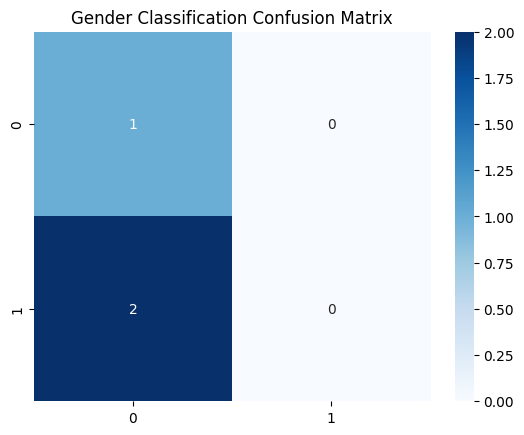

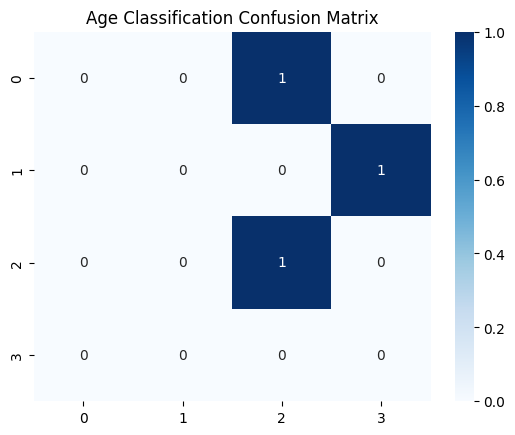

In [100]:

plt.figure()
# Confusion Matrices
sns.heatmap(confusion_matrix(y_gender_test, (y_gender_pred > 0.5).astype(int)), annot=True, fmt='d', cmap='Blues')
plt.title('Gender Classification Confusion Matrix')
plt.show()

plt.figure()
sns.heatmap(confusion_matrix(y_age_test_encoded, np.argmax(y_age_pred, axis=1)), annot=True, fmt='d', cmap='Blues')
plt.title('Age Classification Confusion Matrix')
plt.show()

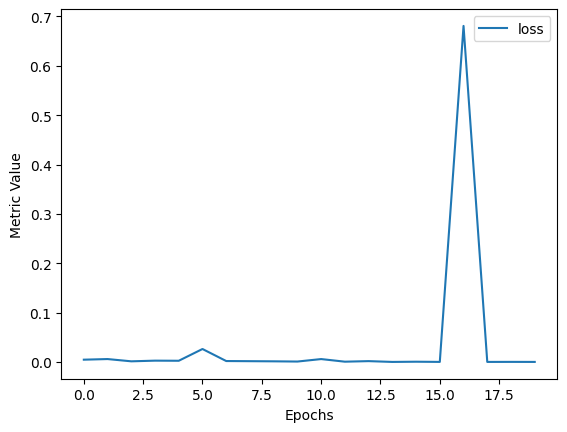

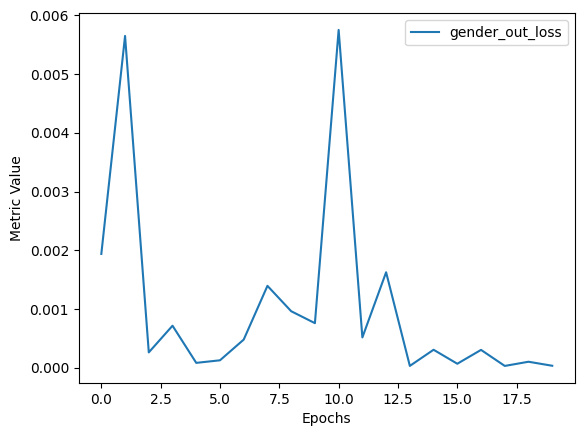

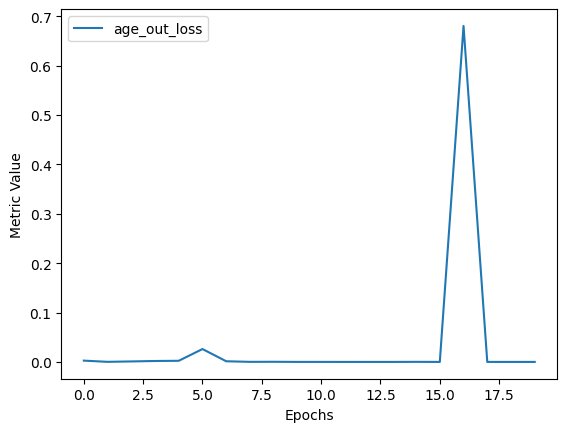

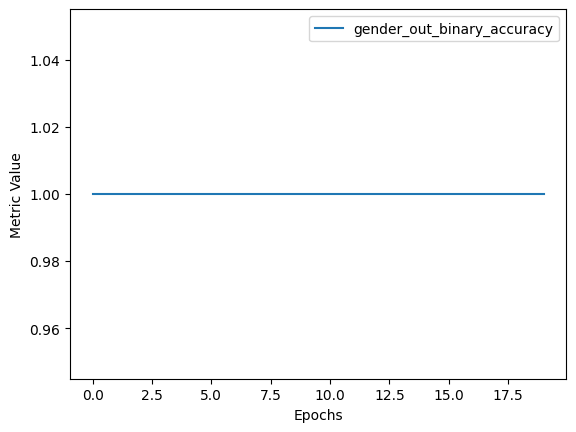

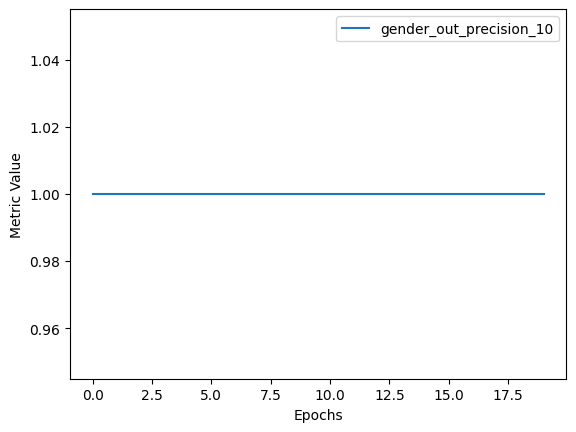

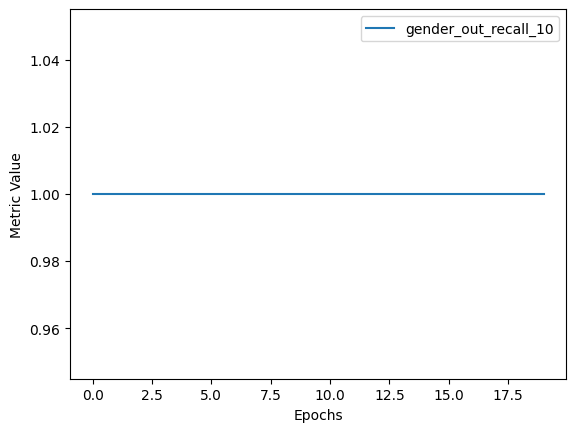

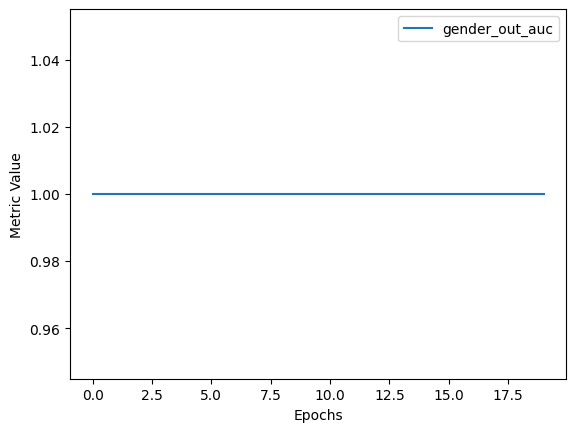

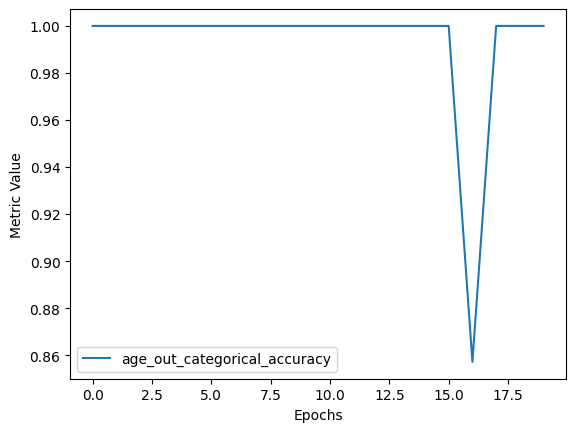

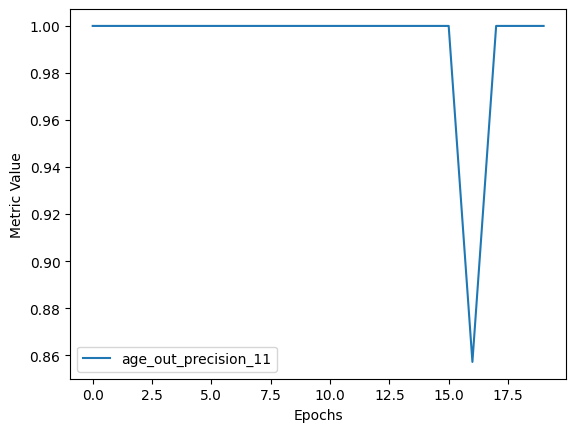

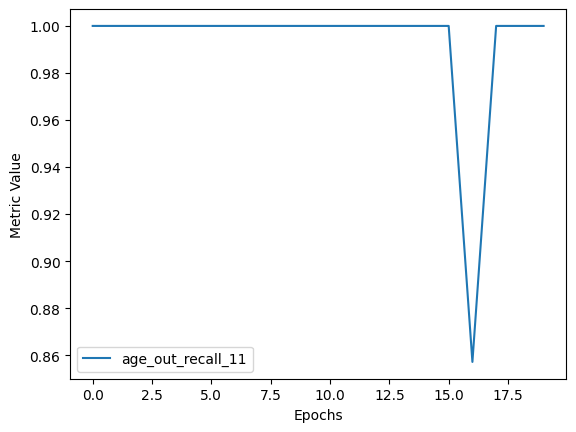

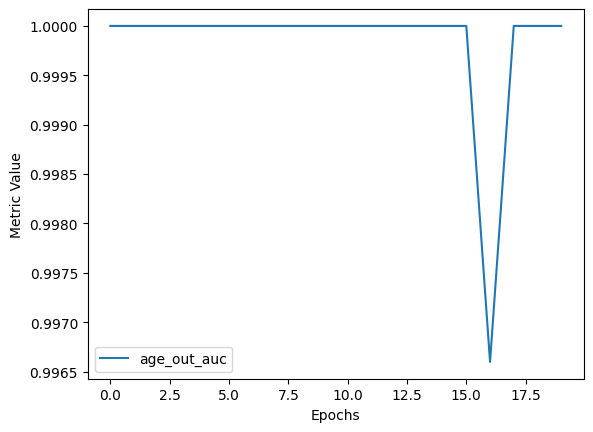

In [102]:
# Extract the keys for all available metrics
metric_keys = [key for key in history.history.keys() if not key.startswith('val_')]

# Plot all metrics
for key in metric_keys:
    plt.figure()
    plt.plot(history.history[key], label=key)
    plt.xlabel('Epochs')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.show()